In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

In [62]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


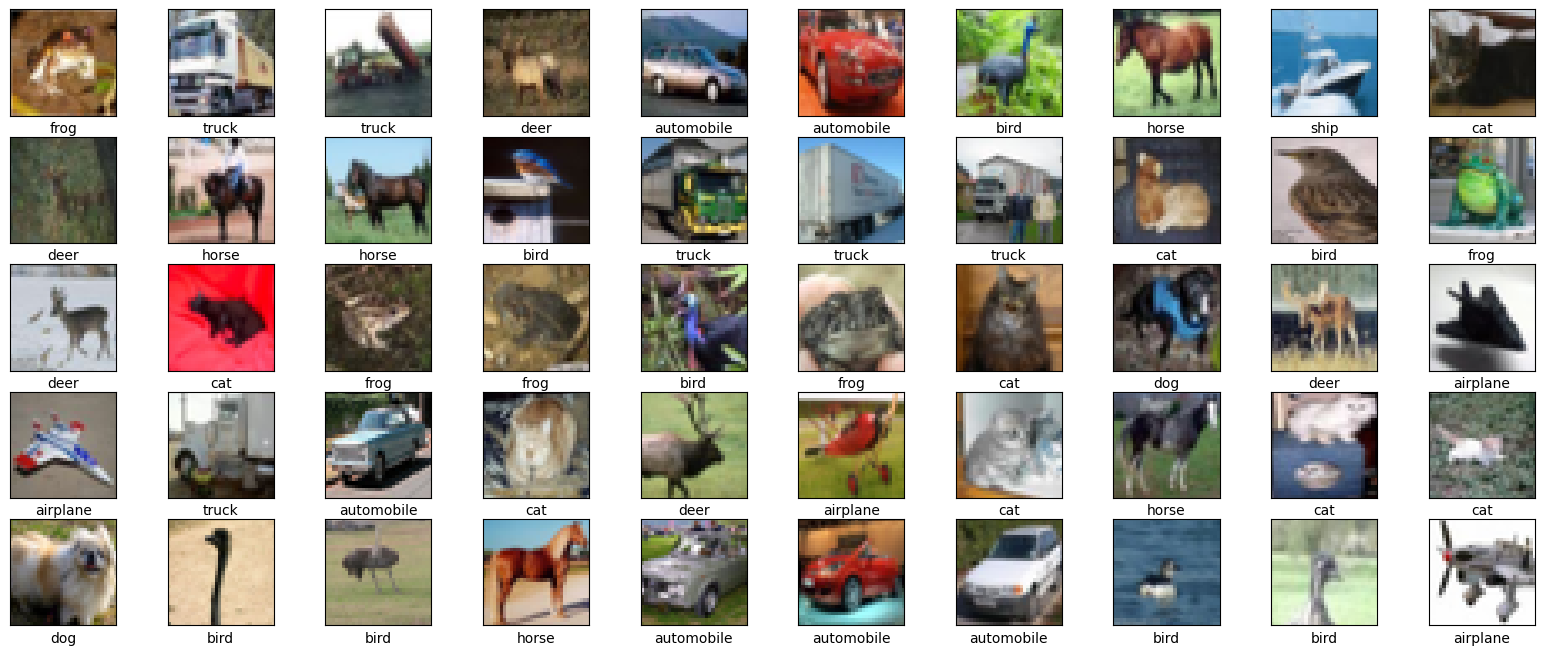

In [63]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])
    
plt.show()

In [64]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 2, 2, 64)        

In [65]:
modelA = model
modelB = model
modelC = model

In [66]:
modelA.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [67]:
h = modelA.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.8744 - accuracy: 0.3567 - val_loss: 1.5062 - val_accuracy: 0.4585
Epoch 2/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4744 - accuracy: 0.4692 - val_loss: 1.4259 - val_accuracy: 0.4941
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3794 - accuracy: 0.5101 - val_loss: 1.3293 - val_accuracy: 0.5305
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2913 - accuracy: 0.5445 - val_loss: 1.2604 - val_accuracy: 0.5560
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2205 - accuracy: 0.5721 - val_loss: 1.2738 - val_accuracy: 0.5535
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1542 - accuracy: 0.5960 - val_loss: 1.2001 - val_accuracy: 0.5876
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.1012 - accuracy: 0.6119 - val_loss: 1.1431 - val_accuracy:

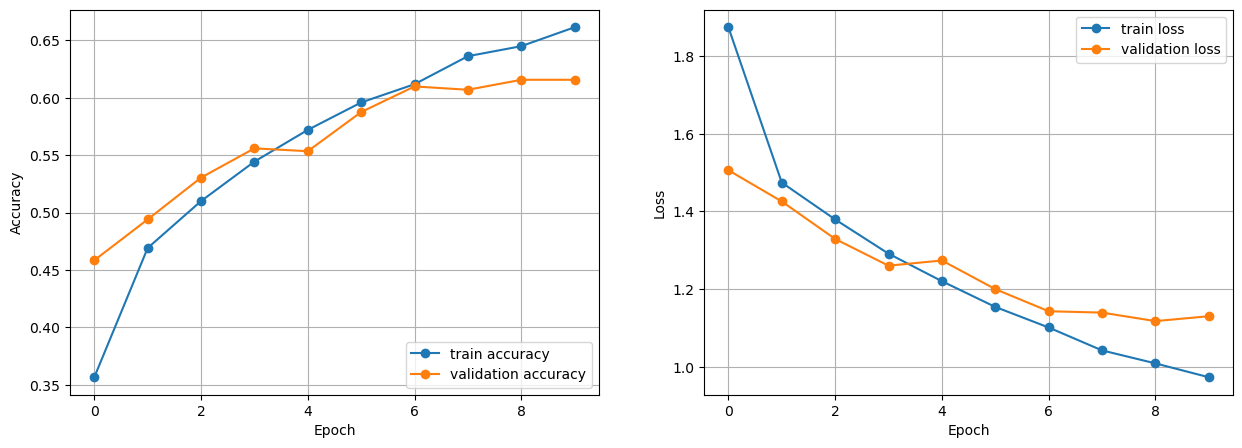

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

313/313 [==============================] - 1s 4ms/step - loss: 1.1576 - accuracy: 0.6127

Test Accuracy: 0.6127000451087952

Test Loss: 1.157612919807434
313/313 [==============================] - 1s 2ms/step


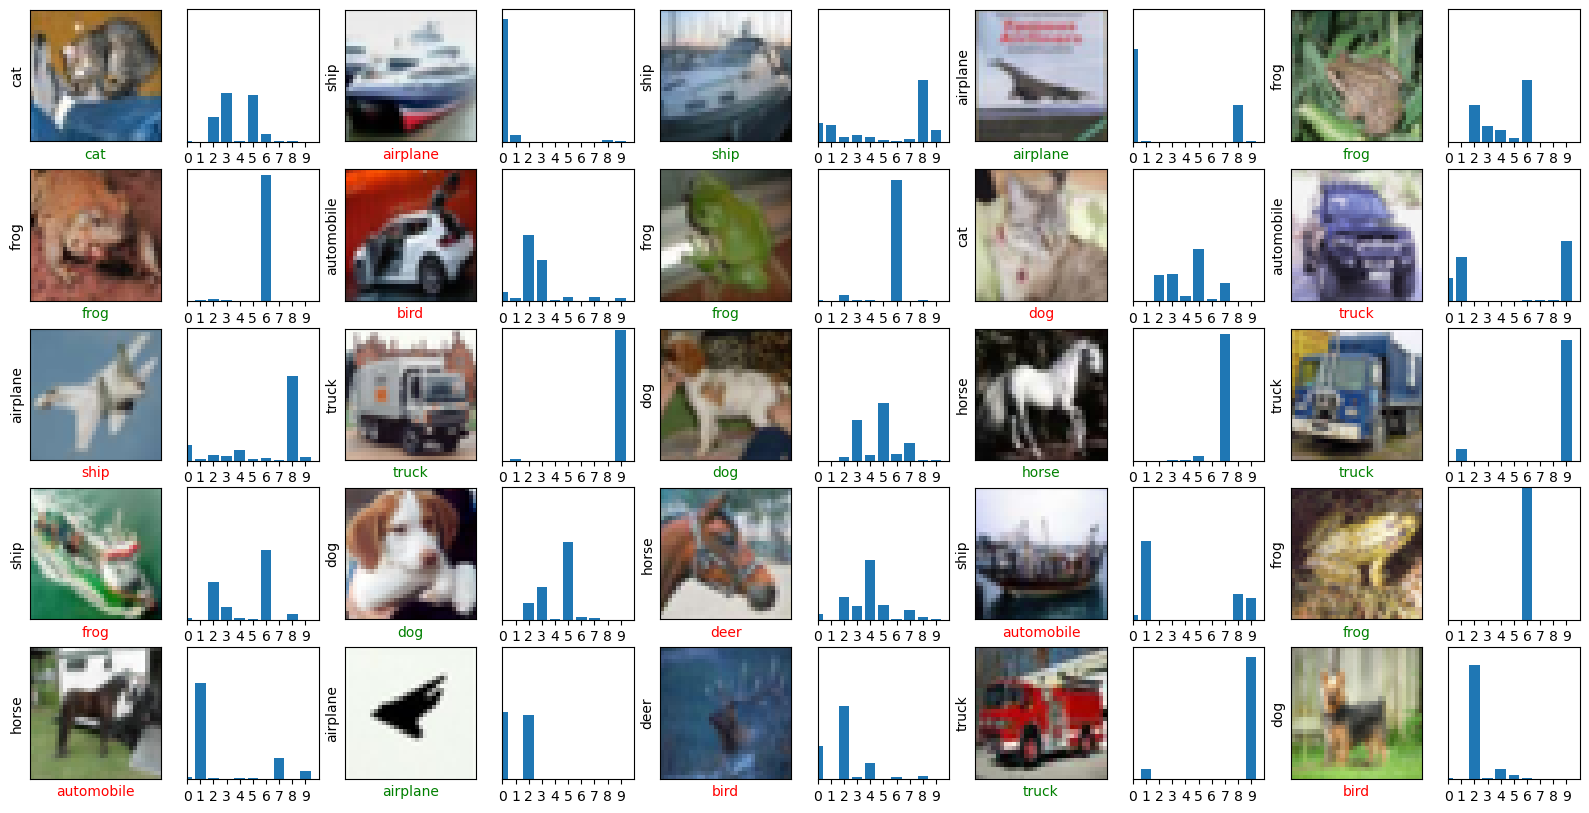

In [69]:
test_loss, test_acc = modelA.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

predictions = modelA.predict(X_test)

rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()

In [70]:
modelB.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

h = modelB.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2041 - accuracy: 0.2108 - val_loss: 1.8521 - val_accuracy: 0.2782
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8280 - accuracy: 0.3193 - val_loss: 2.1292 - val_accuracy: 0.2922
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7221 - accuracy: 0.3657 - val_loss: 1.6960 - val_accuracy: 0.3802
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6342 - accuracy: 0.4053 - val_loss: 1.6253 - val_accuracy: 0.4255
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5559 - accuracy: 0.4425 - val_loss: 1.6134 - val_accuracy: 0.4152
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4972 - accuracy: 0.4673 - val_loss: 1.5325 - val_accuracy: 0.4477
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4513 - accuracy: 0.4847 - val_loss: 1.4720 - val_accuracy:

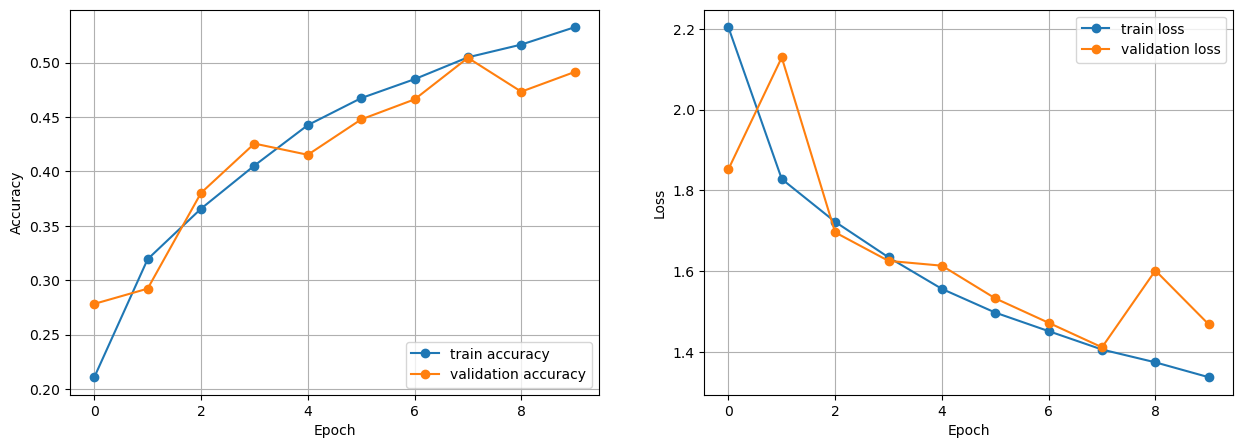

In [71]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

313/313 [==============================] - 1s 4ms/step - loss: 1.3199 - accuracy: 0.5713

Test Accuracy: 0.5713000297546387

Test Loss: 1.3198808431625366
313/313 [==============================] - 1s 2ms/step


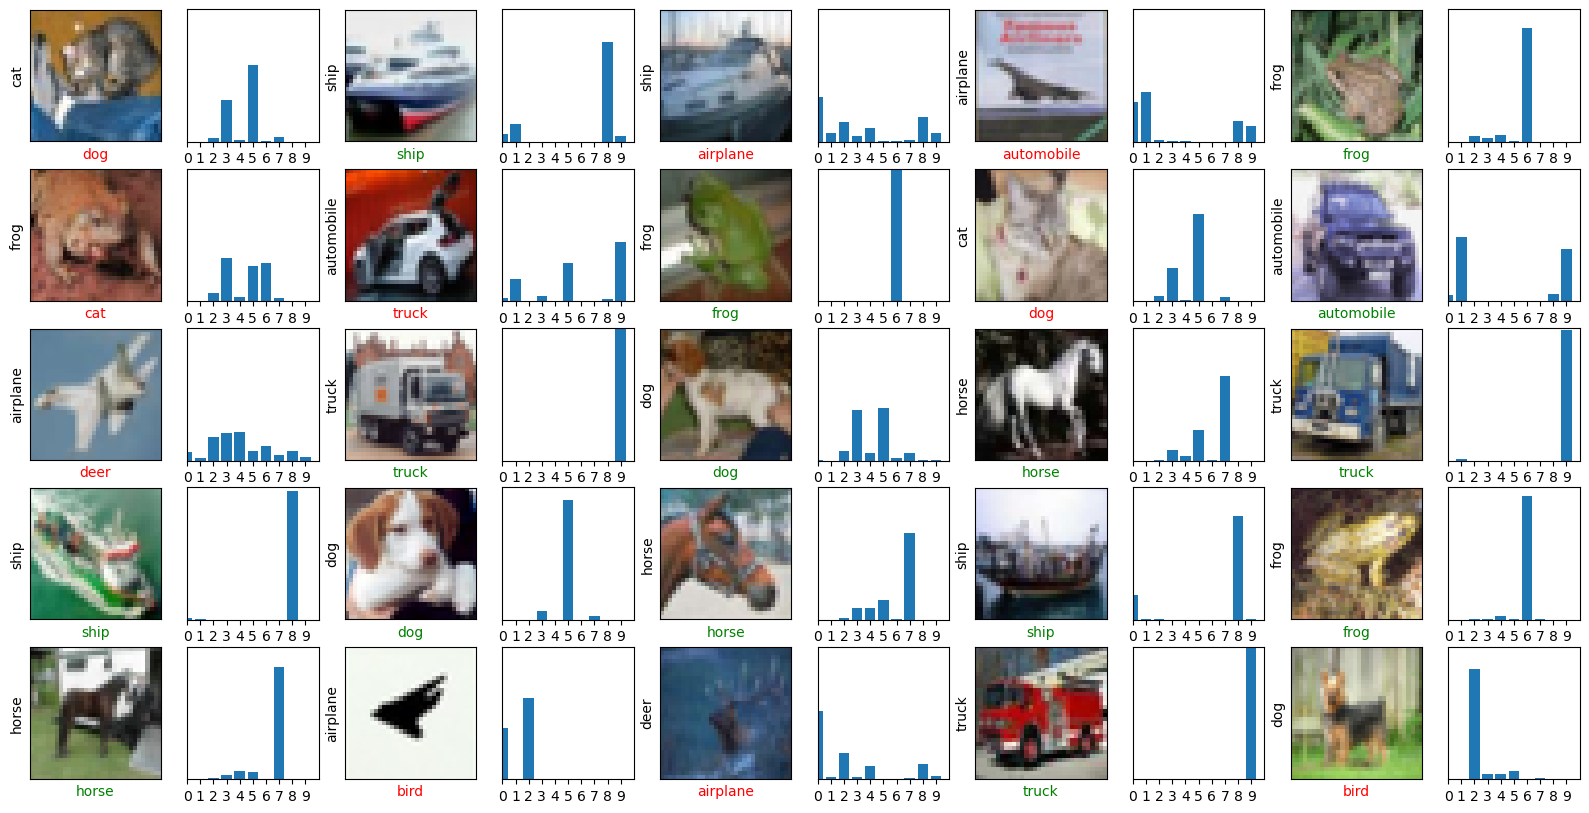

In [74]:
test_loss, test_acc = modelB.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

predictions = modelB.predict(X_test)

rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()

In [72]:
modelC.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

h = modelC.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2455 - accuracy: 0.5681 - val_loss: 1.3132 - val_accuracy: 0.5498
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2077 - accuracy: 0.5893 - val_loss: 1.3618 - val_accuracy: 0.5450
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1931 - accuracy: 0.5984 - val_loss: 1.2908 - val_accuracy: 0.5829
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1544 - accuracy: 0.6112 - val_loss: 1.3586 - val_accuracy: 0.5538
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1333 - accuracy: 0.6212 - val_loss: 1.3727 - val_accuracy: 0.5627
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1177 - accuracy: 0.6270 - val_loss: 1.2616 - val_accuracy: 0.5948
Epoch 7/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1200 - accuracy: 0.6292 - val_loss: 1.3407 - val_accuracy:

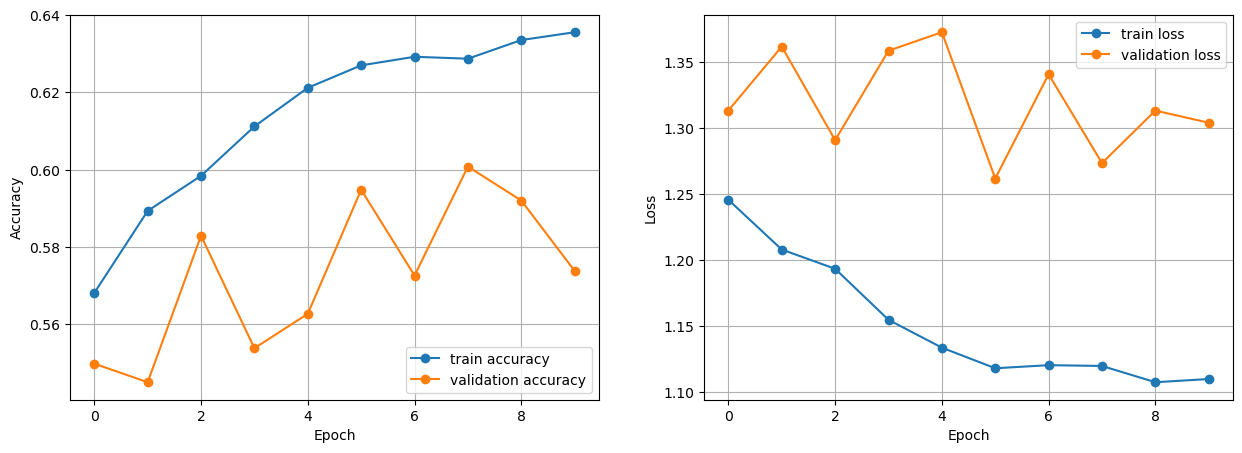

In [73]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

313/313 [==============================] - 1s 4ms/step - loss: 1.3199 - accuracy: 0.5713

Test Accuracy: 0.5713000297546387

Test Loss: 1.3198808431625366
313/313 [==============================] - 1s 2ms/step


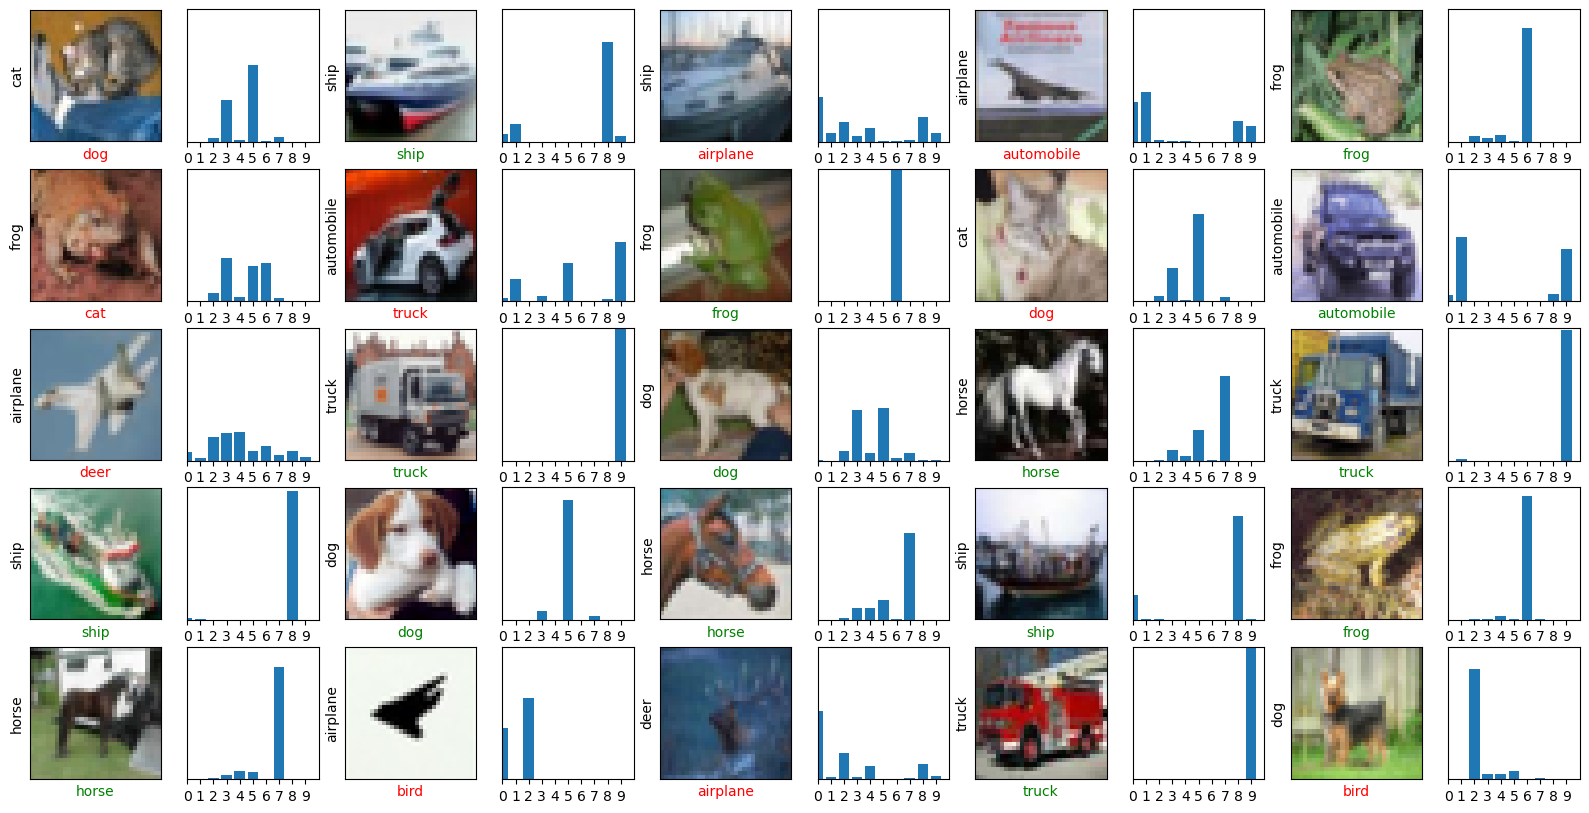

In [75]:
test_loss, test_acc = modelC.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

predictions = modelC.predict(X_test)

rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()